This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [10]:
# If haven't downloaded it yet, please get the data file with wget
#!pip install wget
#import wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/ --no-check-certificate

--2021-11-16 09:24:22--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-16 09:24:22--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc2d9ed5899ddf73d11c2f87c54.dl.dropboxusercontent.com/cd/0/inline/BaEFym9RbLYA3CMyqs5HTvdlCHRFnhalqv6BlOpOcKgRDANcVg5SLKC-vowtqyFTIjcNQL8osjRsKhYASlYkvUE1f7CuUDiZx1szFiIXmb2raF-y0pGDG-_-HHBYGhojVsno6kbMPh7GyVKYgDHLdgnc/file# [following]
--2021-11-16 09:24:22--  https://ucc2d9ed5899ddf73d11c2f87c54.dl.dropboxusercontent.com/cd/0/inline/BaEFym9RbLYA3CMyqs5HTvdlCHRFnhalqv6BlOpOcKgRDANcVg5SLKC-

 14900K .......... .......... .......... .......... .......... 46% 8.07M 3s
 14950K .......... .......... .......... .......... .......... 46% 4.64M 3s
 15000K .......... .......... .......... .......... .......... 46% 7.66M 3s
 15050K .......... .......... .......... .......... .......... 46% 6.44M 3s
 15100K .......... .......... .......... .......... .......... 46% 7.71M 3s
 15150K .......... .......... .......... .......... .......... 46% 6.45M 3s
 15200K .......... .......... .......... .......... .......... 47% 5.95M 3s
 15250K .......... .......... .......... .......... .......... 47% 1.04M 3s
 15300K .......... .......... .......... .......... .......... 47% 9.52M 3s
 15350K .......... .......... .......... .......... .......... 47% 5.17M 3s
 15400K .......... .......... .......... .......... .......... 47% 1.09M 3s
 15450K .......... .......... .......... .......... .......... 47% 8.13M 3s
 15500K .......... .......... .......... .......... .......... 47% 5.47M 3s
 15550K ....

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [2]:
import pandas as pd

data = pd.read_csv('data/data_000637.txt') #importing the dataframe
total_rows = data.shape[0] #getting the total number of rows in the file
N = 500000 #value bigger than 10k and lower than total_rows

data = pd.read_csv('data/data_000637.txt', nrows = N) #resetting the dataframe to N rows
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
499995,1,1,25,3869205221,2330,28
499996,1,1,23,3869205221,2335,10
499997,1,1,139,3869205221,2336,0
499998,1,1,24,3869205221,2333,21


2\. Estimate the number of BX in a ORBIT (the value 'x').

In [3]:
import numpy as np

orbit_cnt = data[["ORBIT_CNT","BX_COUNTER","TDC_MEAS"]]
times = pd.DataFrame(orbit_cnt).to_numpy()

x = np.amax(times[:,1])
#print(x)
print("The estimation of x is ",x+1, " which is the highest value found in the bx_counter column.")

The estimation of x is  3564  which is the highest value found in the bx_counter column.


3\. Find out the duration of the data taking in hours, minutes and seconds. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading the whole dataset.

In [4]:
#TDC_MEAS = 25/30 ns
#BX_COUNTER = 25 ns
seconds =[]
#creating a list of the duration of each measurement
for i in range(N):
    seconds.append((times[i,0]*x*25 + times[i,1]*25 + times[i,2]*(25/30))*pow(10,-9))

secs = np.mean(seconds) #found the mean of all measurments
#print(secs)
hours = np.around(secs//3600)
print("Hours: ", hours)
secs %= 3600
minutes = np.around(secs//60)
print("Minutes: ",minutes)
secs %= 60
print("Seconds: ", np.around(secs))

Hours:  95.0
Minutes:  44.0
Seconds:  9.0


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition.

In [5]:
data['ABS_SEC'] = secs*pow(10,9) #the list was created in the previous exercise
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_SEC
0,1,0,123,3869200167,2374,26,9.228071e+09
1,1,0,124,3869200167,2374,27,9.228071e+09
2,1,0,63,3869200167,2553,28,9.228071e+09
3,1,0,64,3869200167,2558,19,9.228071e+09
4,1,0,64,3869200167,2760,25,9.228071e+09
...,...,...,...,...,...,...,...
499995,1,1,25,3869205221,2330,28,9.228071e+09
499996,1,1,23,3869205221,2335,10,9.228071e+09
499997,1,1,139,3869205221,2336,0,9.228071e+09
499998,1,1,24,3869205221,2333,21,9.228071e+09


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [31]:
noisy = data.groupby(["TDC_CHANNEL"], sort = False).max() #group by the number of max counts (TDC_MEAS)

noisy.nlargest(3, 'TDC_MEAS')
#df.nlargest(3, 'TDC_MEAS')

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_SEC
TDC_CHANNEL,,,,,,
123,1,1,3869205220,3563,29,9.228071e+09
124,1,0,3869205221,3563,29,9.228071e+09
63,1,1,3869205221,3563,29,9.228071e+09


6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit). Count also the number of unique orbits with at least one measurement from TDC_CHANNEL=139. 

In [14]:
#First request
dframe = data[data['TDC_MEAS'] != 0] #is this the request of the exercise?
print(len(dframe.index))


#Second request
df = data[data['TDC_CHANNEL'] == 139]
unique = df['ORBIT_CNT'].nunique()
print("The number of unique orbits with TDC_CHANNEL = 139 is ", unique)

443521
The number of unique orbits with TDC_CHANNEL = 139 is  5035


7\. **Optional:** Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

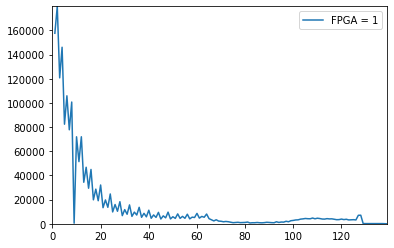

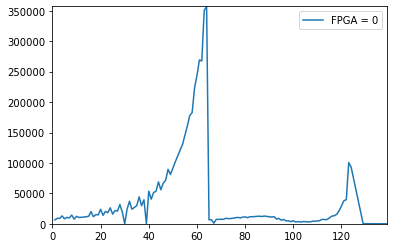

In [40]:
import matplotlib.pyplot as plt


dataf1 = data[data['FPGA'] == 1]
dataf1 = dataf1.groupby(['TDC_CHANNEL']).sum()
x1 = list(dataf1.index) #list of all the TDC channels
y1 = dataf1['TDC_MEAS'].tolist() #value of TDC counts for each channel

plt.plot(x1,y1, label = "FPGA = 1")
plt.axis([0,139,0,max(y1)])
plt.legend()
plt.show()

dataf2 = data[data['FPGA'] == 0]
dataf2 = dataf2.groupby(['TDC_CHANNEL']).sum()
x2 = list(dataf2.index) #list of all the TDC channels
y2 = dataf2['TDC_MEAS'].tolist() #value of TDC counts for each channel

plt.plot(x2,y2, label = "FPGA = 0")
plt.axis([0,139,0,max(y2)])
plt.legend()
plt.show()